<a href="https://colab.research.google.com/github/karthika1498/KNN/blob/main/KNN_assignments(zoo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Implement a KNN model to classify the animals in to categorie**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo (1).csv


In [ ]:



zoo=pd.read_csv("Zoo.csv")
zoo


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:







zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo.shape

(101, 18)

In [ ]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo.duplicated().sum()

0

In [ ]:
type=zoo["type"].value_counts()

- data visualization using correlation and heat map

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dython.nominal import associations


In [ ]:
zoo1=zoo.drop("animal name",axis=1)
zoo1.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


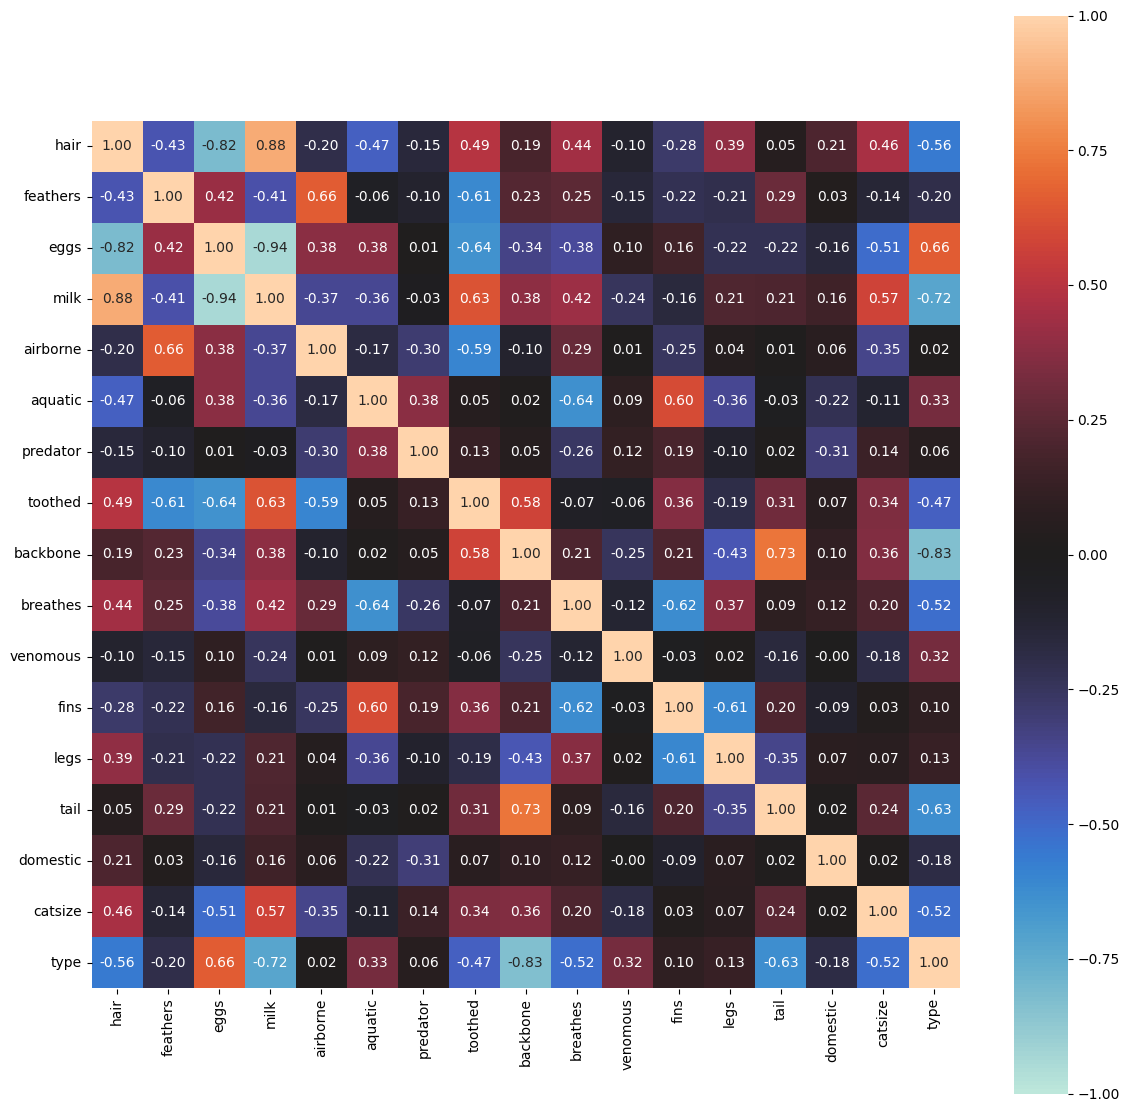

{'corr':               hair  feathers      eggs      milk  airborne   aquatic  \
 hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
 feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
 eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
 milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
 airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
 aquatic  -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
 predator -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
 toothed   0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
 backbone  0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
 breathes  0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
 venomous -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
 fins     -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
 legs      0.394009 -0.206686 -0.224918  0.

In [ ]:
associations(zoo1,figsize=(14,14))

<Axes: >

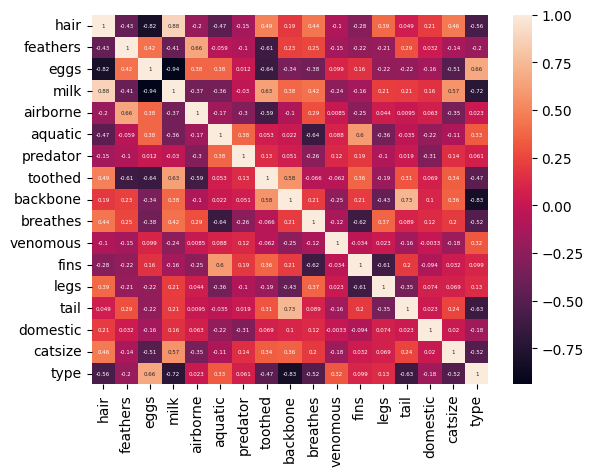

In [ ]:
sns.heatmap(zoo1.corr(),annot=True,annot_kws={"size":4})

<Axes: xlabel='legs', ylabel='count'>

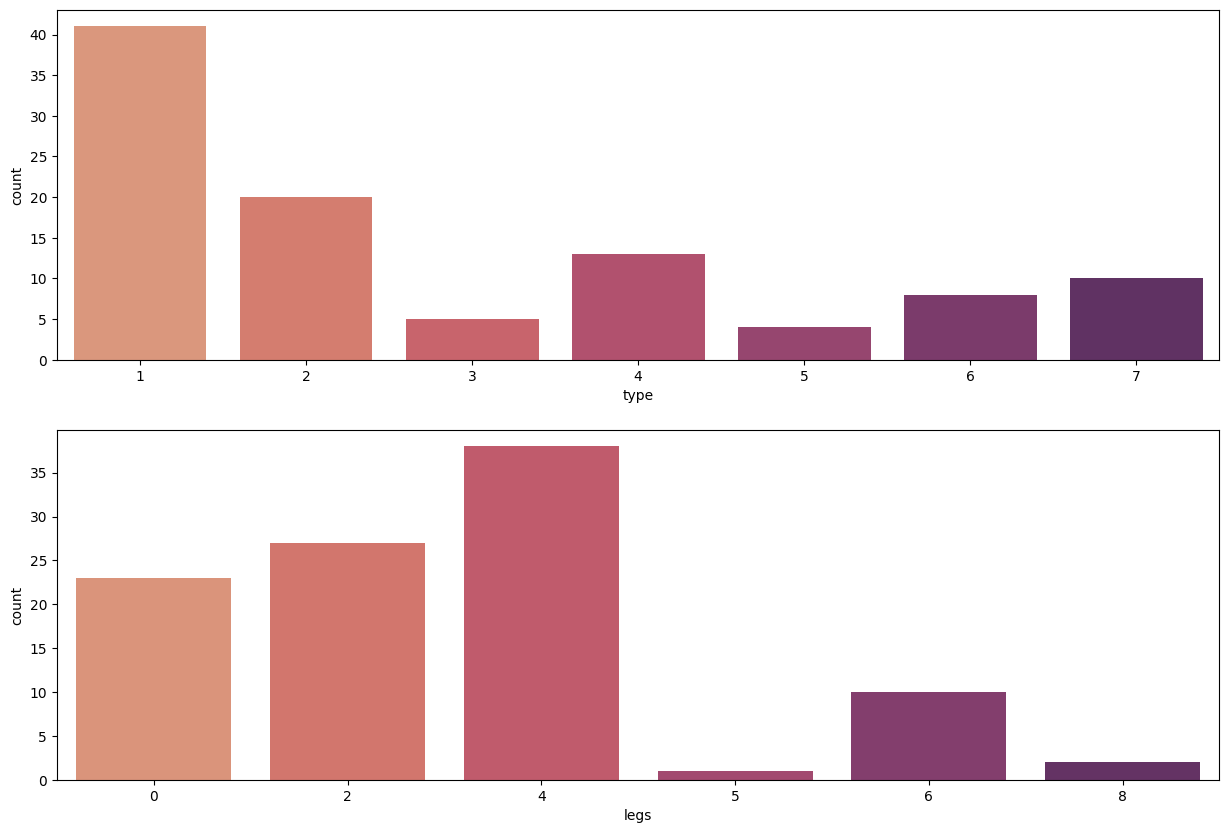

In [ ]:
fig, ax =plt.subplots(2,1, figsize=(15,10)) 

sns.countplot(x="type",data=zoo, palette='flare' , ax=ax[0])
sns.countplot(x="legs",data=zoo, palette='flare', ax=ax[1])

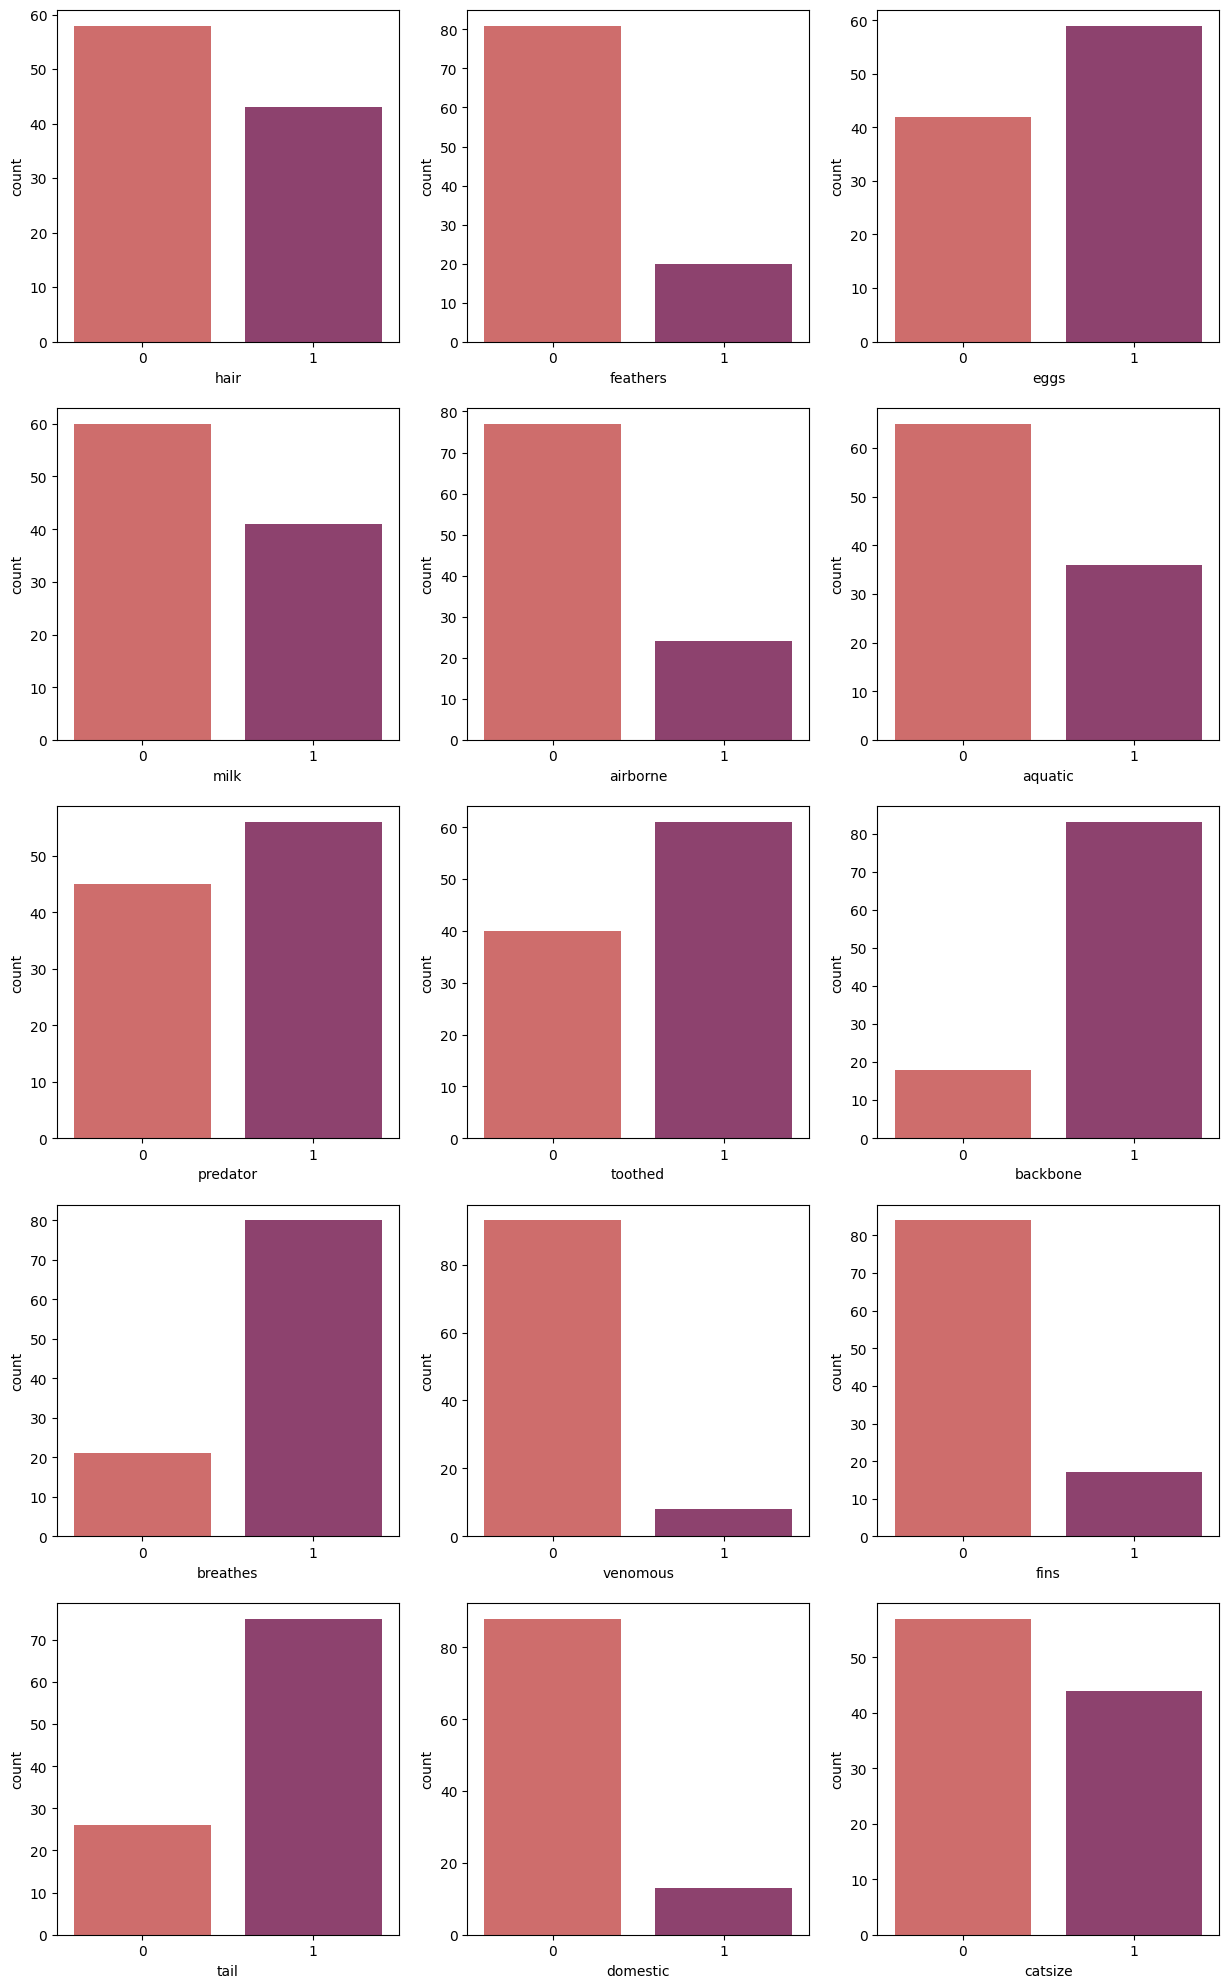

In [ ]:
fig, ax =plt.subplots(5,3, figsize=(15,25)) 


sns.countplot(x='hair',data=zoo, palette='flare', ax=ax[0,0])
sns.countplot(x='feathers',data=zoo, palette='flare', ax=ax[0,1])
sns.countplot(x='eggs',data=zoo, palette='flare', ax=ax[0,2])

sns.countplot(x='milk',data=zoo, palette='flare', ax=ax[1,0])
sns.countplot(x='airborne',data=zoo, palette='flare', ax=ax[1,1])
sns.countplot(x='aquatic',data=zoo, palette='flare', ax=ax[1,2])

sns.countplot(x='predator',data=zoo, palette='flare', ax=ax[2,0])
sns.countplot(x='toothed',data=zoo, palette='flare', ax=ax[2,1])
sns.countplot(x='backbone',data=zoo, palette='flare', ax=ax[2,2])

sns.countplot(x='breathes',data=zoo, palette='flare', ax=ax[3,0])
sns.countplot(x='venomous',data=zoo, palette='flare', ax=ax[3,1])
sns.countplot(x='fins',data=zoo, palette='flare', ax=ax[3,2])

sns.countplot(x='tail',data=zoo, palette='flare', ax=ax[4,0])
sns.countplot(x='domestic',data=zoo, palette='flare', ax=ax[4,1])
sns.countplot(x='catsize',data=zoo, palette='flare', ax=ax[4,2]);

- data preprocessing

In [ ]:
x=zoo.drop(["type","animal name"],axis=1)
y=zoo[["type"]]

In [ ]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [ ]:
y.head()

,type
0,1
1,1
2,4
3,1
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70, 16)
(70, 1)
(31, 16)
(31, 1)


- to choose the k value==> initially we take k=5

In [ ]:
kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=5)
result=cross_val_score(model,x,y,cv=kfold)
#here we use x and y because here we used a kfold cv

In [ ]:
print(result.mean()*100)

88.00000000000001


In [ ]:
#we can use train_test_split also
model = KNeighborsClassifier(n_neighbors=5) # K = 5
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)
print('Accuracy with k = 5 and train test split', accuracy_score(y_test, pred_y))
     

Accuracy with k = 5 and train test split 0.9354838709677419


- gridsearch cv for finding best k value

In [ ]:
n_neighbors=np.array(range(1,40,2))
grid_param=dict(n_neighbors=n_neighbors)

In [ ]:
grid_param

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [ ]:
kfold=KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=grid_param, cv=kfold)
grid.fit(x, y)  


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.9800000000000001


when we use k as 1 then overfitting condition is occures

In [ ]:
n_neighbors=np.array(range(3,40,2))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39])}

In [ ]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3}
0.9400000000000001


**we choose the k value as odd because**
- When the value of K is set to even, a situation may arise in which the elements from both groups surrounding new datapoint are equal.

- In this condition, the model would be unable to do the correct classification. Here the model will randomly assign any of the two classes to this new unknown data.

- Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

**visualize the k value and the performance**

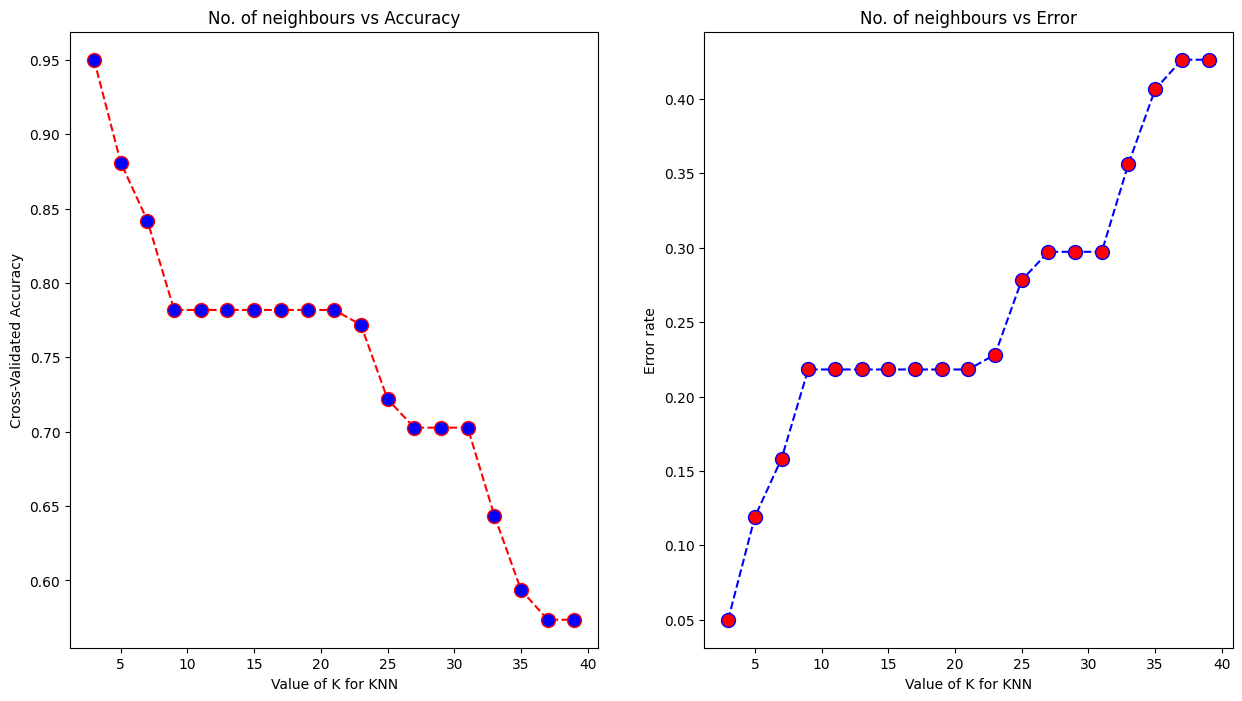

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show() 

- build the model k=3

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)

0.9354838709677419

In [ ]:
print(classification_report(y_test, pred_y)) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



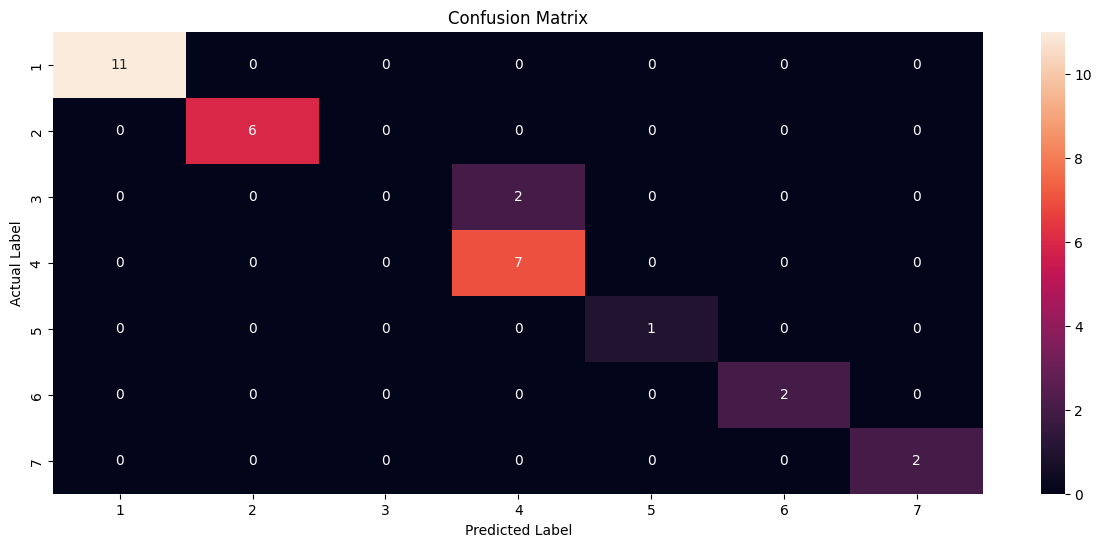

In [ ]:
cm_df = confusion_matrix(y_test, pred_y)
class_label = ['1','2','3','4','5','6','7'] #class 3 is absent in test set

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()